<a href="https://colab.research.google.com/github/JonPaulBIlbao/ML-Finance-DBS/blob/Logistic-regression/Titanic_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Opening with load

In [1]:
# Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import chi2_contingency


Loading data

In [2]:
titanic_train = pd.read_csv("/content/drive/MyDrive/Grado Finanzas/24-25/Decision Trees/Titanic/train.csv")
titanic_test = pd.read_csv("/content/drive/MyDrive/Grado Finanzas/24-25/Decision Trees/Titanic/test.csv")


Explore and prepare data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             N

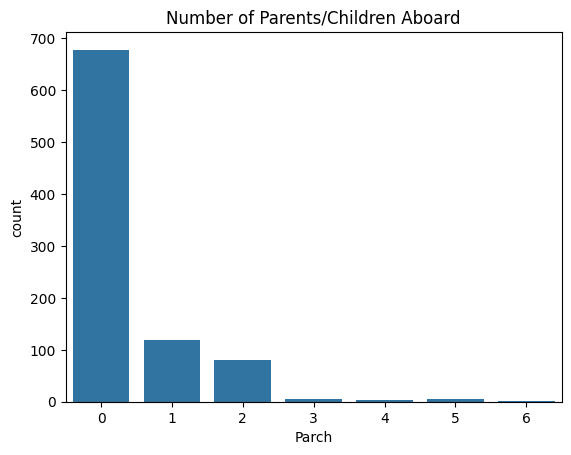

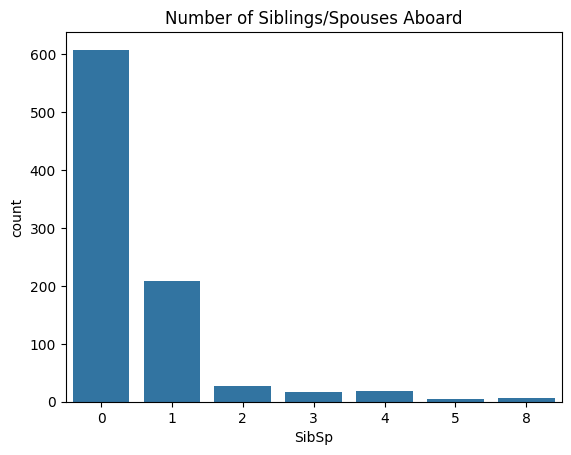

Alone         Alone  Not Alone
Survived                      
0         69.646182  49.435028
1         30.353818  50.564972
Chi2ContingencyResult(statistic=np.float64(36.00051446773864), pvalue=np.float64(1.9726543846517183e-09), dof=1, expected_freq=array([[330.87878788, 218.12121212],
       [206.12121212, 135.87878788]]))


In [3]:
print(titanic_train.info())
print(titanic_train.describe(include='all'))

# Convert 'Survived' to category
titanic_train['Survived'] = titanic_train['Survived'].astype('category')

# Crosstab: Survival by Sex
print(pd.crosstab(titanic_train['Survived'], titanic_train['Sex']))
print(chi2_contingency(pd.crosstab(titanic_train['Survived'], titanic_train['Sex'])))
print(pd.crosstab(titanic_train['Survived'], titanic_train['Sex'], normalize='columns') * 100)

# Bar plots for Parch and SibSp
sns.countplot(x='Parch', data=titanic_train)
plt.title("Number of Parents/Children Aboard")
plt.show()

sns.countplot(x='SibSp', data=titanic_train)
plt.title("Number of Siblings/Spouses Aboard")
plt.show()

# Create "Alone" feature
titanic_train['Alone'] = np.where((titanic_train['Parch'] == 0) & (titanic_train['SibSp'] == 0), 1, 0)
titanic_train['Alone'] = titanic_train['Alone'].map({0: 'Not Alone', 1: 'Alone'}).astype('category')

# Crosstab Alone vs Survived
print(pd.crosstab(titanic_train['Survived'], titanic_train['Alone'], normalize='columns') * 100)
print(chi2_contingency(pd.crosstab(titanic_train['Survived'], titanic_train['Alone'])))


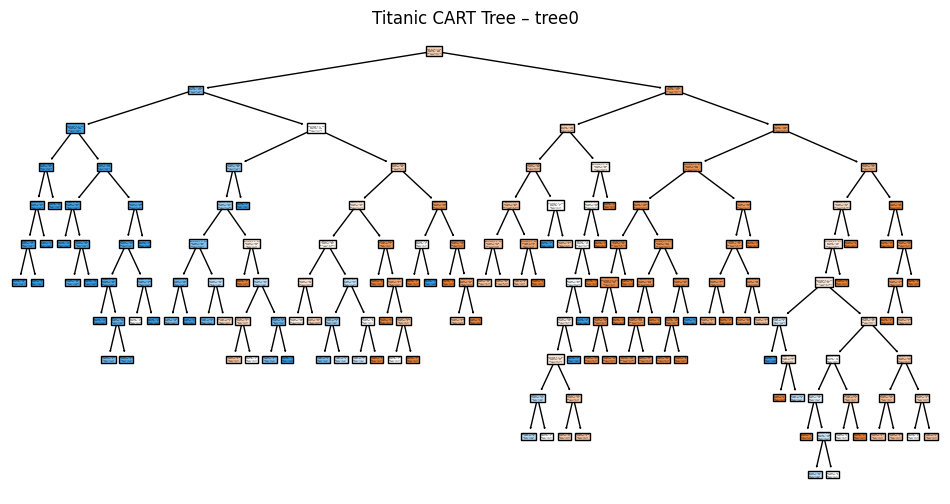

In [9]:
# Minimal preprocessing for decision trees
features = ['Sex', 'Embarked', 'Parch', 'SibSp', 'Pclass']
titanic_train = titanic_train.dropna(subset=features + ['Survived'])

# Convert categorical vars
X = pd.get_dummies(titanic_train[features])
y = titanic_train['Survived']

# tree0: default settings
tree0 = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree0.fit(X, y)

# Plot tree0
plt.figure(figsize=(12, 6))
plot_tree(tree0, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Titanic CART Tree – tree0")
plt.show()


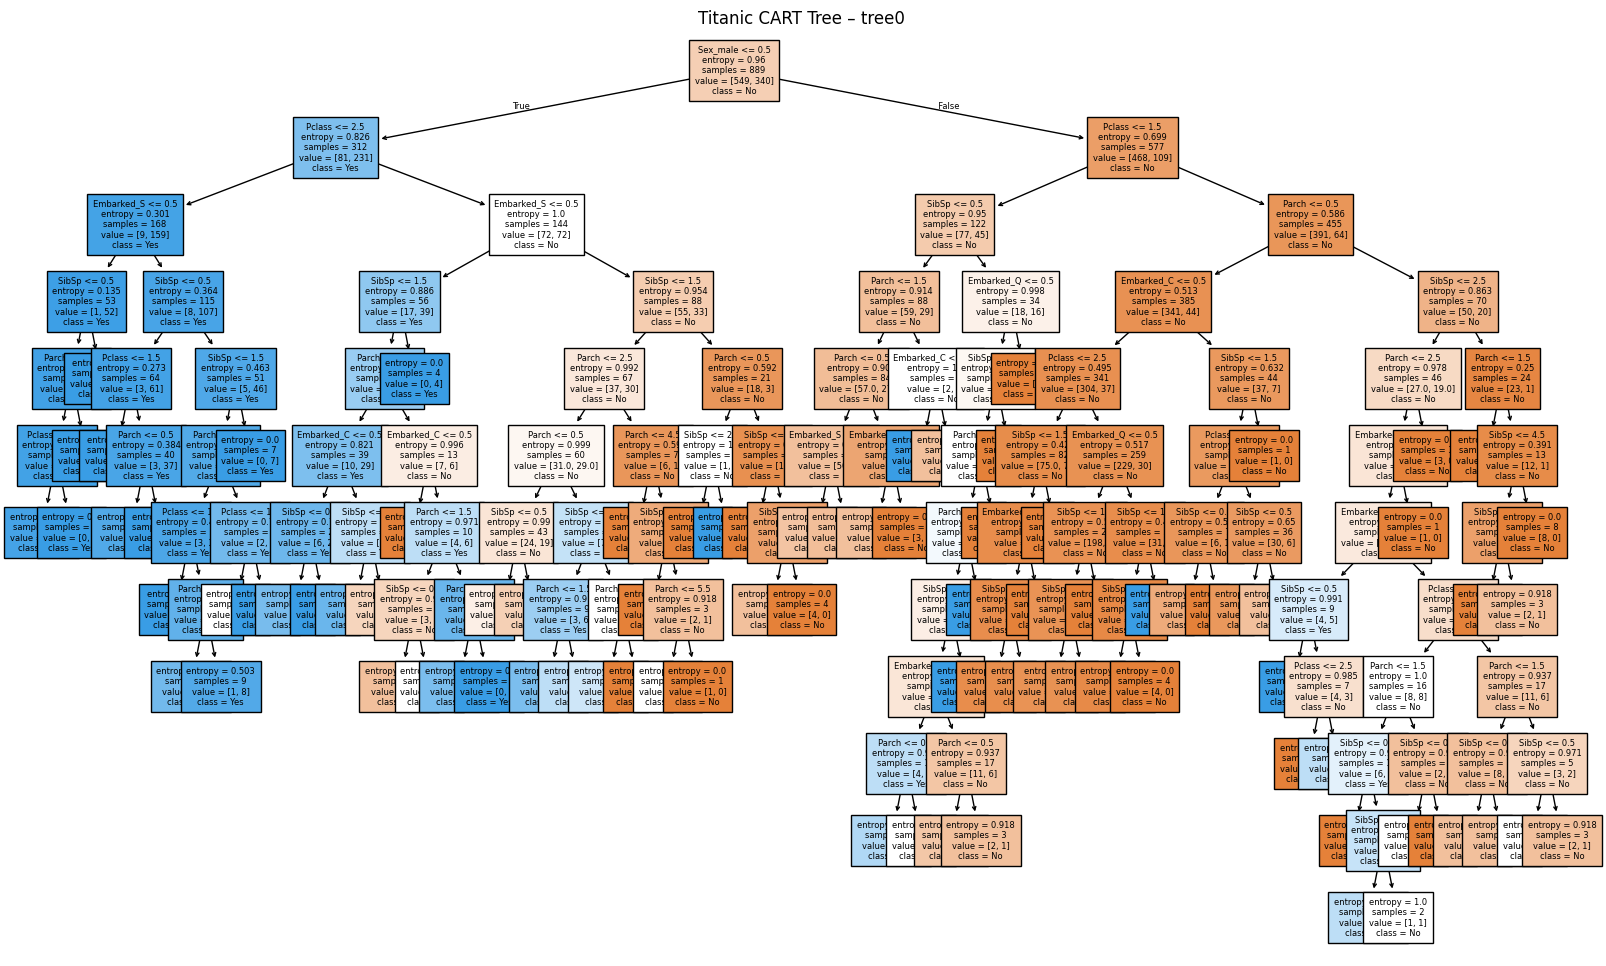

In [8]:
plt.figure(figsize=(20, 12))  # Make the figure larger
plot_tree(tree0, feature_names=X.columns, class_names=["No", "Yes"], filled=True, fontsize=6)
plt.title("Titanic CART Tree – tree0")
plt.savefig("tree0_highres.png", dpi=300, bbox_inches="tight")
plt.show()

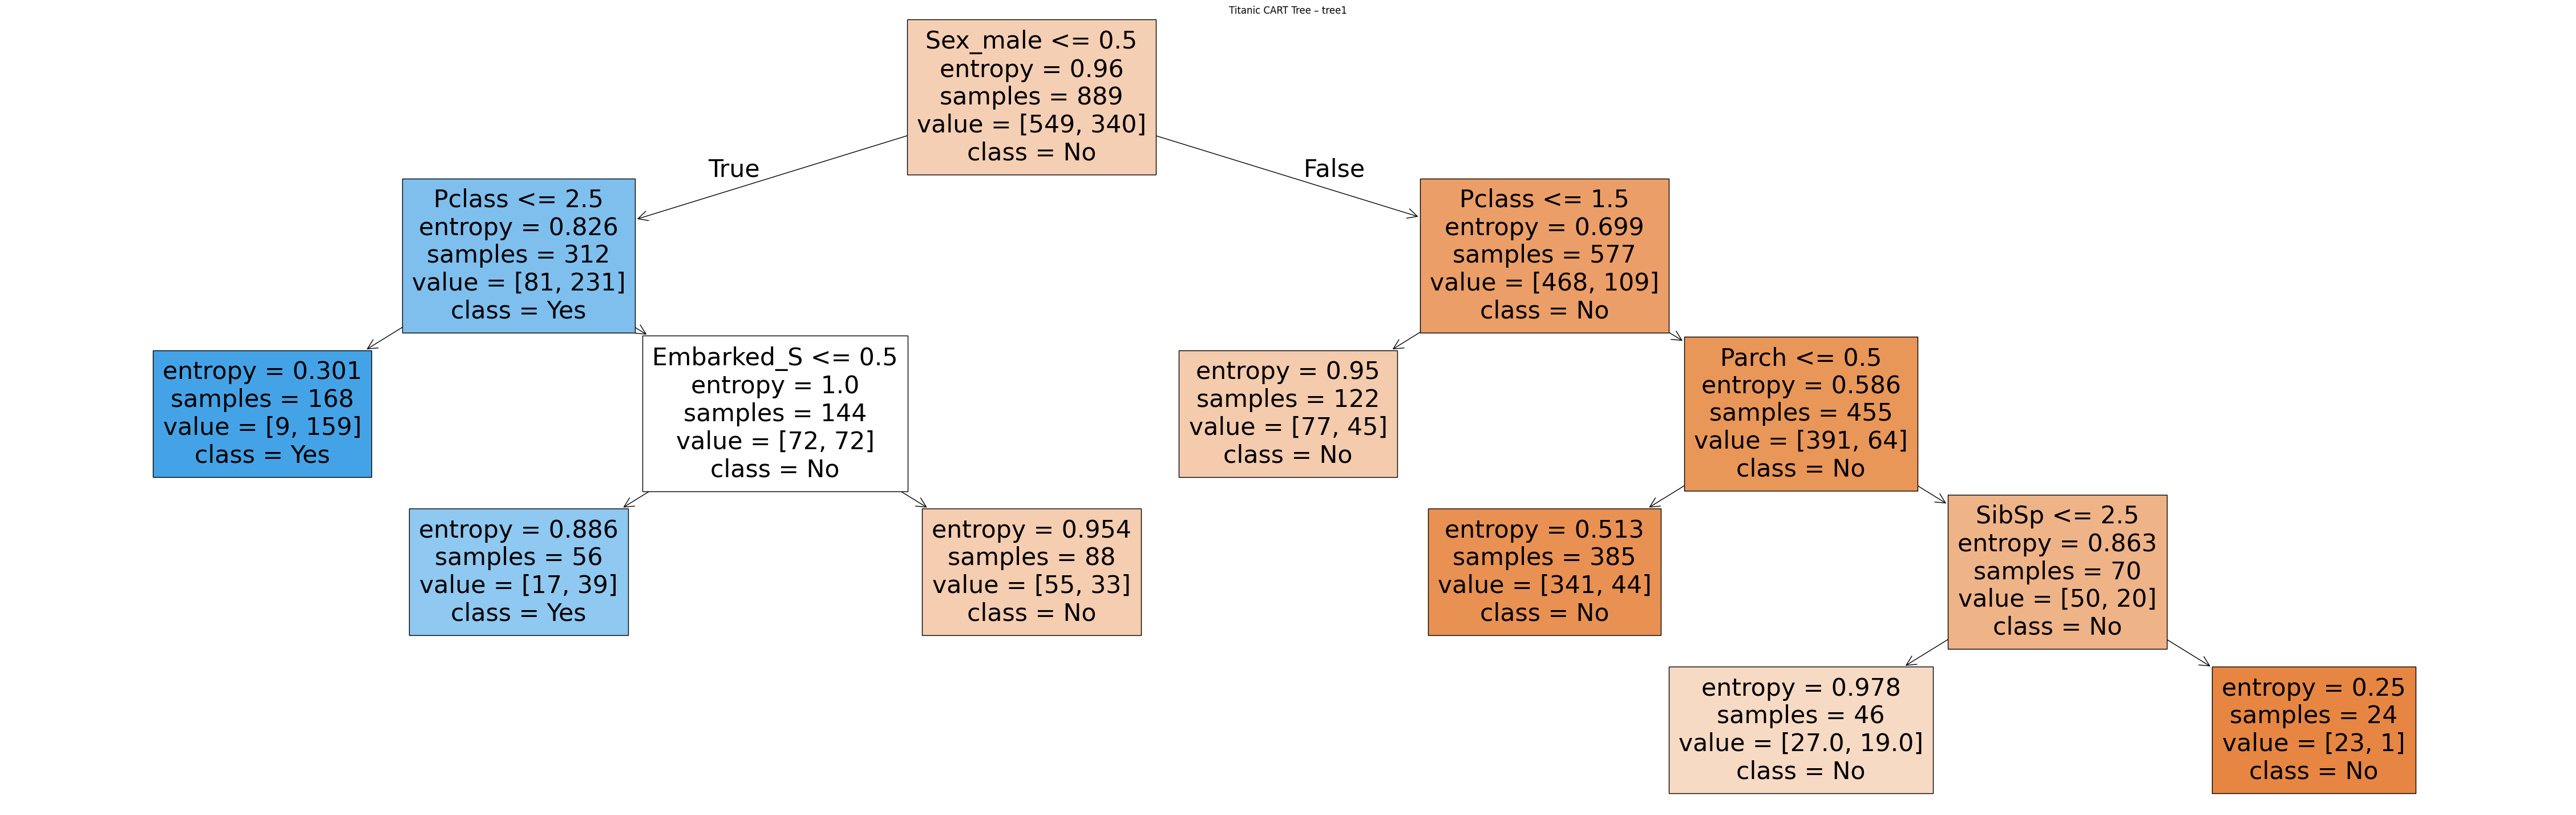

In [16]:
tree1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=20, ccp_alpha=0.01, random_state=42)
tree1.fit(X, y)

# Plot tree1
plt.figure(figsize=(58, 18))
plot_tree(tree1, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Titanic CART Tree – tree1")
plt.show()


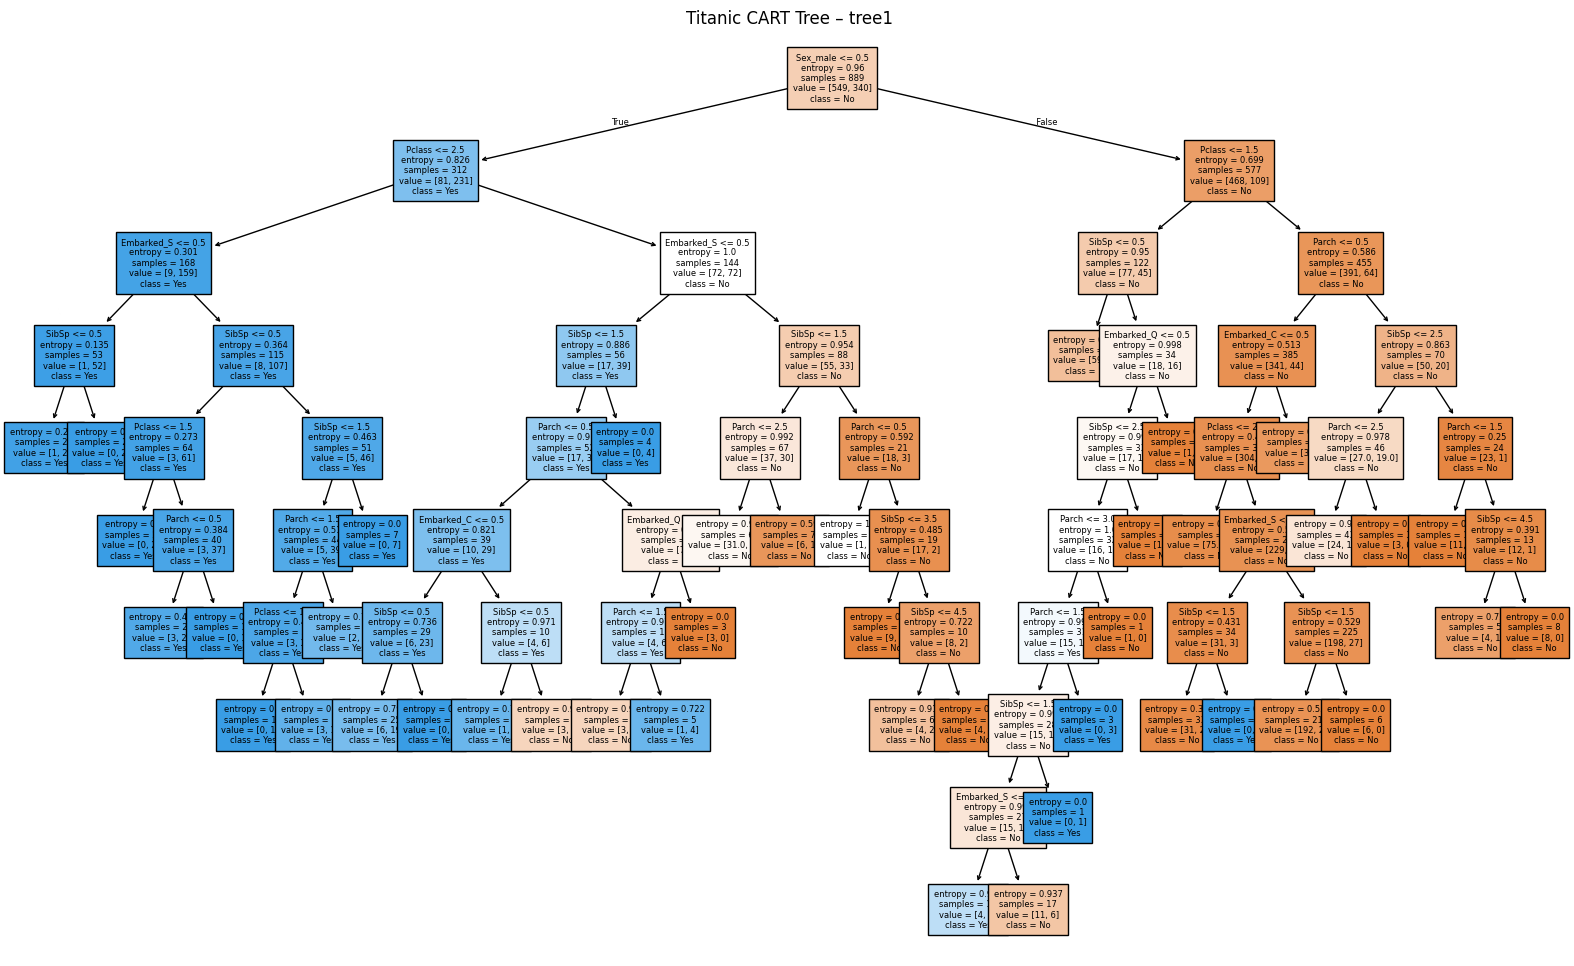

In [7]:
plt.figure(figsize=(20, 12))  # Make the figure larger
plot_tree(tree1, feature_names=X.columns, class_names=["No", "Yes"], filled=True, fontsize=6)
plt.title("Titanic CART Tree – tree1")
plt.savefig("tree1_highres.png", dpi=300, bbox_inches="tight")
plt.show()


In [6]:
X_test = pd.get_dummies(titanic_test[features])
# Match columns to training set
X_test = X_test.reindex(columns=X.columns, fill_value=0)

titanic_test['pred_class_tree0'] = tree0.predict(X_test)
titanic_test['pred_class_tree1'] = tree1.predict(X_test)

# Compare tree0 and tree1
print(pd.crosstab(titanic_test['pred_class_tree0'], titanic_test['pred_class_tree1']))


pred_class_tree1    0    1
pred_class_tree0          
0                 277    5
1                  19  117
